# Online Fraud Detection 

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,accuracy_score
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
df = pd.read_csv("onlinefraud.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [7]:
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:ylabel='type'>

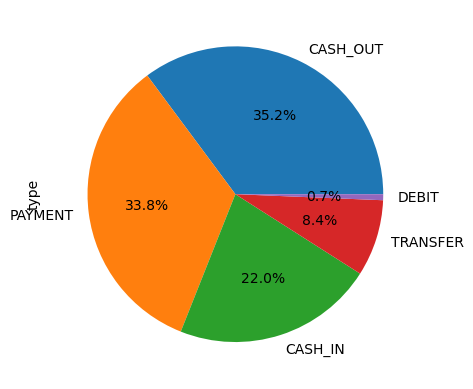

In [8]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [9]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:ylabel='isFraud'>

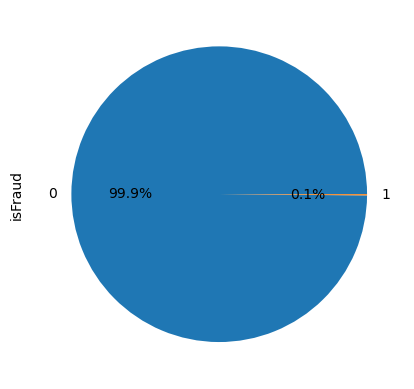

In [10]:
df['isFraud'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


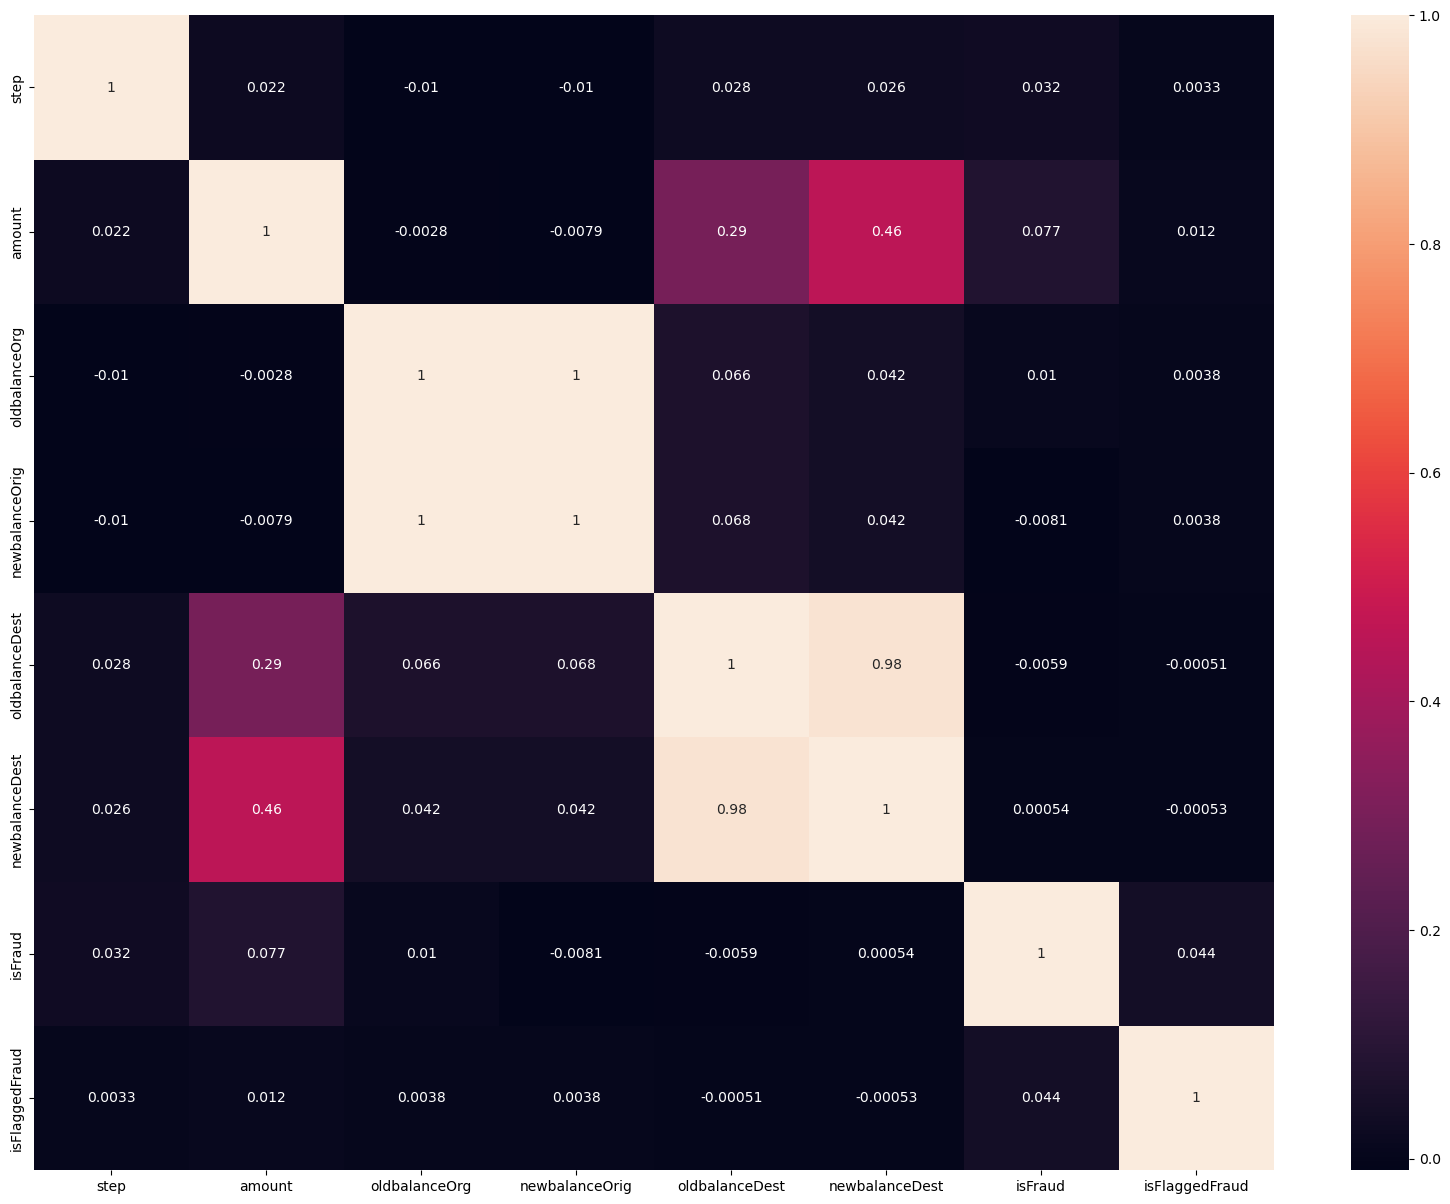

In [14]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(df.corr(),annot=True)

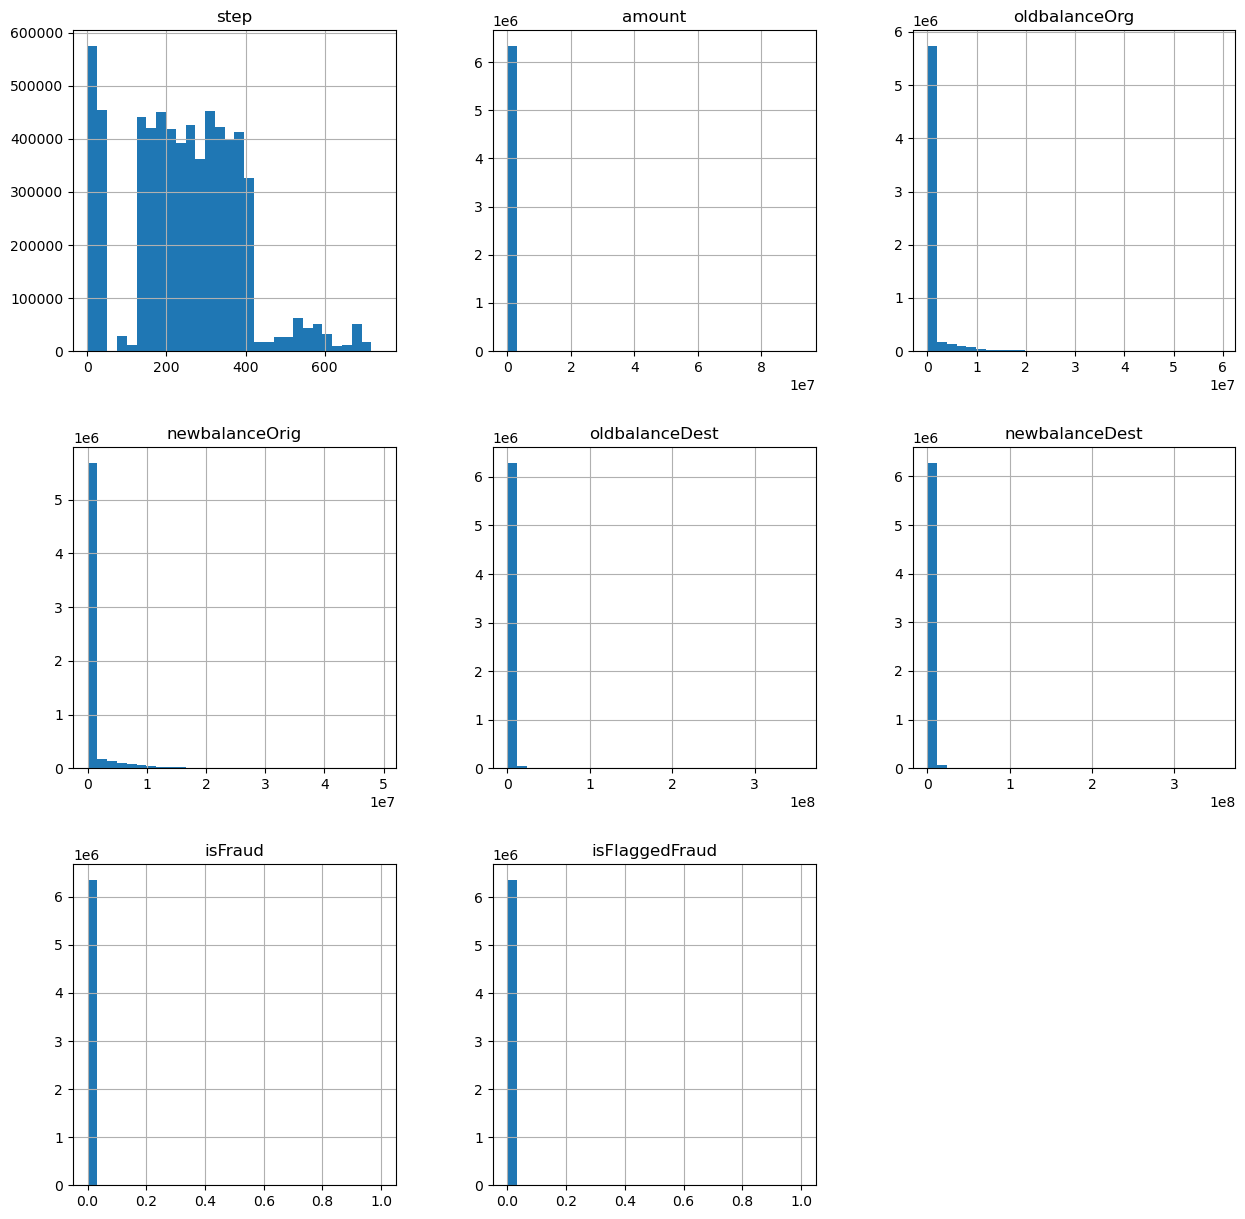

In [15]:
df.hist(bins=30, figsize=(15,15))
plt.show()

<AxesSubplot:>

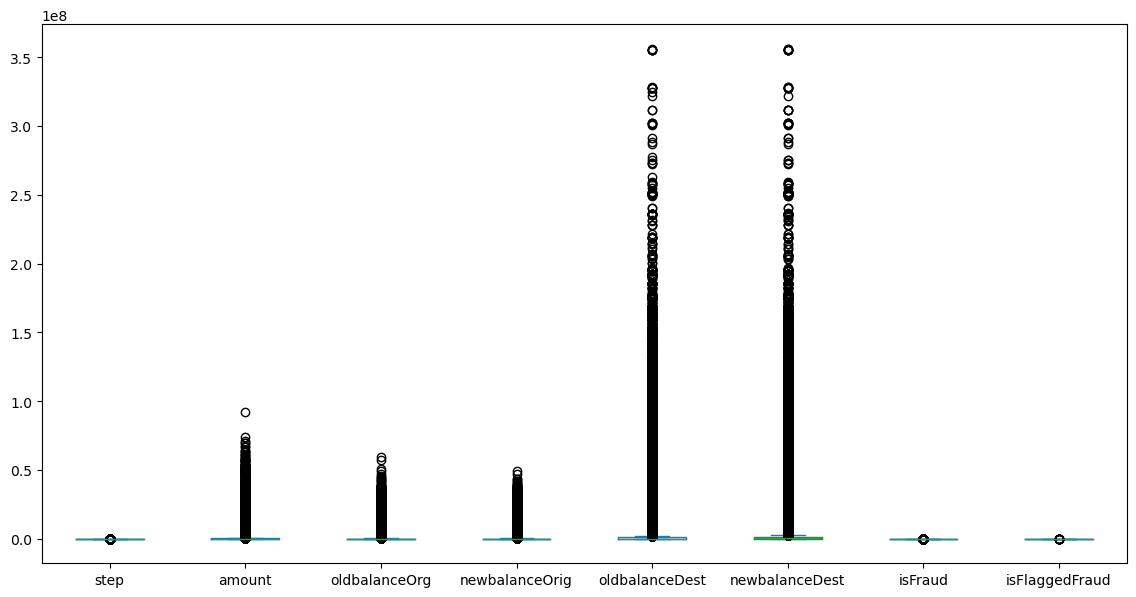

In [16]:
df.plot(kind='box', figsize=(14,7))

# Data Imbalancing

In [17]:
!pip install imbalanced-learn

In [18]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [19]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [26]:
data = df.drop(["type", "nameOrig", "nameDest"], axis = 1)

In [28]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["isFraud"]]
# Store the variable we are predicting 
target = "isFraud"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(6362620, 7)
(6362620,)


In [29]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,181.00,181.00,0.00,0.00,0.00,0
3,1,181.00,181.00,0.00,21182.00,0.00,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0


In [22]:
data.isnull().values.any()

False

In [30]:
## Get the Fraud and the normal dataset 

fraud = data[data['isFraud']==1]

normal = data[data['isFraud']==0]

In [31]:
print(fraud.shape,normal.shape)

(8213, 8) (6354407, 8)


Oversampling

In [33]:
# Implementing Oversampling for Handling Imbalanced 
# smk = SMOTETomek(random_state=42)
# X_res,y_res=smk.fit_resample(X,Y)

In [34]:
# X_res.shape,y_res.shape

((12707668, 7), (12707668,))

Undersampling

In [36]:
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,Y)

In [37]:
X_res.shape,y_res.shape

((16426, 7), (16426,))

In [38]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 6354407, 1: 8213})
Resampled dataset shape Counter({0: 8213, 1: 8213})


# Ensemble Learning

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [40]:
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

In [41]:
estimators = [('lr',clf1),('rf',clf2),('knn',clf3)]

In [44]:
for estimator in estimators:
    x = cross_val_score(estimator[1],X_res,y_res,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),4))

lr 0.9788
rf 0.9836
knn 0.9828


In [47]:
# Hard voting
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=estimators,voting='hard')
x = cross_val_score(vc,X_res,y_res,cv=10,scoring='accuracy')
print(np.round(np.mean(x),4))

0.9839


In [58]:
# Soft voting
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X_res,y_res,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

0.98


In [60]:
from sklearn.svm import SVC

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)

svm1 = SVC(probability=True, kernel='poly', degree=1)
svm2 = SVC(probability=True, kernel='poly', degree=2)
svm3 = SVC(probability=True, kernel='poly', degree=3)
svm4 = SVC(probability=True, kernel='poly', degree=4)
svm5 = SVC(probability=True, kernel='poly', degree=5)

estimators = [('svm1',svm1),('svm2',svm2),('svm3',svm3),('svm4',svm4),('svm5',svm5)]


for estimator in estimators:
    x = cross_val_score(estimator[1],X_res,y_res,cv=10,scoring='accuracy')
    print(estimator[0],np.round(np.mean(x),3))

svm1 0.926


In [ ]:
vc1 = VotingClassifier(estimators=estimators,voting='soft')
x = cross_val_score(vc1,X,y,cv=10,scoring='accuracy')
print(np.round(np.mean(x),2))

# Cross Validation

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.30, random_state=600)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
result = model.score(X_test, y_test)
print(result)

0.9833603896103896


K Fold Cross Validation

In [50]:
from sklearn.model_selection import KFold
model=DecisionTreeClassifier()
kfold_validation=KFold(10)

In [52]:
import numpy as np
from sklearn.model_selection import cross_val_score
results=cross_val_score(model,X_res,y_res,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.99087036 0.982958   0.97626293 0.97443701 0.97565429 0.07364577
 0.96467722 0.95371498 0.96467722 0.98721072]
0.8844108508914281


Stratified Cross Validation

In [53]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X_res,y_res,cv=skfold)
print(np.mean(scores))

0.8870905302788177


In [54]:
scores

array([0.53804017, 0.97016743, 0.9695586 , 0.97808219, 0.97960426])

# Conclusion


We covered 5 different methods for dealing with imbalanced datasets:

Change the performance metric
Oversampling minority class
Undersampling majority class
Change the algorithm
Generate synthetic samples
These are just some of the many possible methods to try when dealing with imbalanced datasets, and not an exhaustive list. Some others methods to consider are collecting more data or choosing different resampling ratios - you don't have to have exactly a 1:1 ratio! You should always try several approaches and then decide which is best for your problem.